## completo_Xception_fine-05_batch-8_lr-0001_auc-99

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
import json

In [4]:
model_name = 'completo_Xception_fine-05_batch-8_lr-0001_auc-99'

In [368]:
model_name = 'completo_layer_mask_Xception_fine-05_batch-8_lr-0001_auc-99'

## Train

In [369]:
path = '/home/mr1142/Documents/Data/models/neumonia/training_data/train_max_completo.csv'
df = pd.read_csv(path)

In [370]:
df.name[df.val_auc == max(df.val_auc)]

3    completo_2_Xception_fine-03_batch-8_lr-0001_au...
Name: name, dtype: object

In [371]:
df[df.name == model_name]

,name,modelo,fine,batch,lr,mask,trainprop,pixels,subset,loss,binary_accuracy,precision,auc,val_loss,val_binary_accuracy,val_precision,val_auc
11,completo_layer_mask_Xception_fine-05_batch-8_l...,Xception,0.5,8,0.0001,True,0.8,512,False,0.417085,0.994963,0.992519,0.999267,0.311366,0.973305,0.959956,0.992633


## Evaluate

In [372]:
path = '/home/mr1142/Documents/Data/models/neumonia/validation_results/image_class_evaluation_completo.csv'
df = pd.read_csv(path)

In [373]:
df.nombre[df.auc == max(df.auc)]

2    completo_2_Xception_fine-03_batch-8_lr-0001_au...
Name: nombre, dtype: object

In [374]:
df[df.nombre == model_name + '_val']

,nombre,loss,binary_accuracy,precision,auc
9,completo_layer_mask_Xception_fine-05_batch-8_l...,0.152518,0.964684,0.947024,0.992633


In [375]:
df[df.nombre == model_name + '_test']

,nombre,loss,binary_accuracy,precision,auc


## Predict

In [376]:
path = '/home/mr1142/Documents/Data/models/neumonia/validation_results/prediction_validation_metrics_completo.csv'
df = pd.read_csv(path)

In [377]:
df['auc_mean'] = (df.auc_0 + df.auc_1 + df.auc_2)/3
df['f1_score_mean'] = (df.f1_score_0 + df.f1_score_1 + df.f1_score_2)/3

In [378]:
df.name[df.f1_score_mean == max(df.f1_score_mean)]

3    completo_2_Xception_fine-05_batch-8_lr--05_auc-99
Name: name, dtype: object

In [379]:
df[df.name == model_name].transpose()

,9
name,completo_layer_mask_Xception_fine-05_batch-8_l...
auc_0,0.994249
younden_0,0.244983
pr_max_0,0.244983
pr_cut_0,0.547058
auc_1,0.988158
younden_1,0.323701
pr_max_1,0.757991
pr_cut_1,0.619478
auc_2,0.99799


In [380]:
df[df.name == model_name + '_test'].transpose()

""
name
auc_0
younden_0
pr_max_0
pr_cut_0
auc_1
younden_1
pr_max_1
pr_cut_1
auc_2


# Plots

## Train

In [381]:
p = os.path.join('/home/mr1142/Documents/Data/models/neumonia/validation_results', model_name)

In [382]:
os.listdir(p)

['metricas.json',
 'pred_rec_plot_0.png',
 'auc_plot_0.png',
 'pr_re_th_plot_0.png',
 'pred_rec_plot_1.png',
 'auc_plot_1.png',
 'pr_re_th_plot_1.png',
 'pred_rec_plot_2.png',
 'auc_plot_2.png',
 'pr_re_th_plot_2.png',
 'class_report.csv']

<Figure size 2000x2000 with 0 Axes>

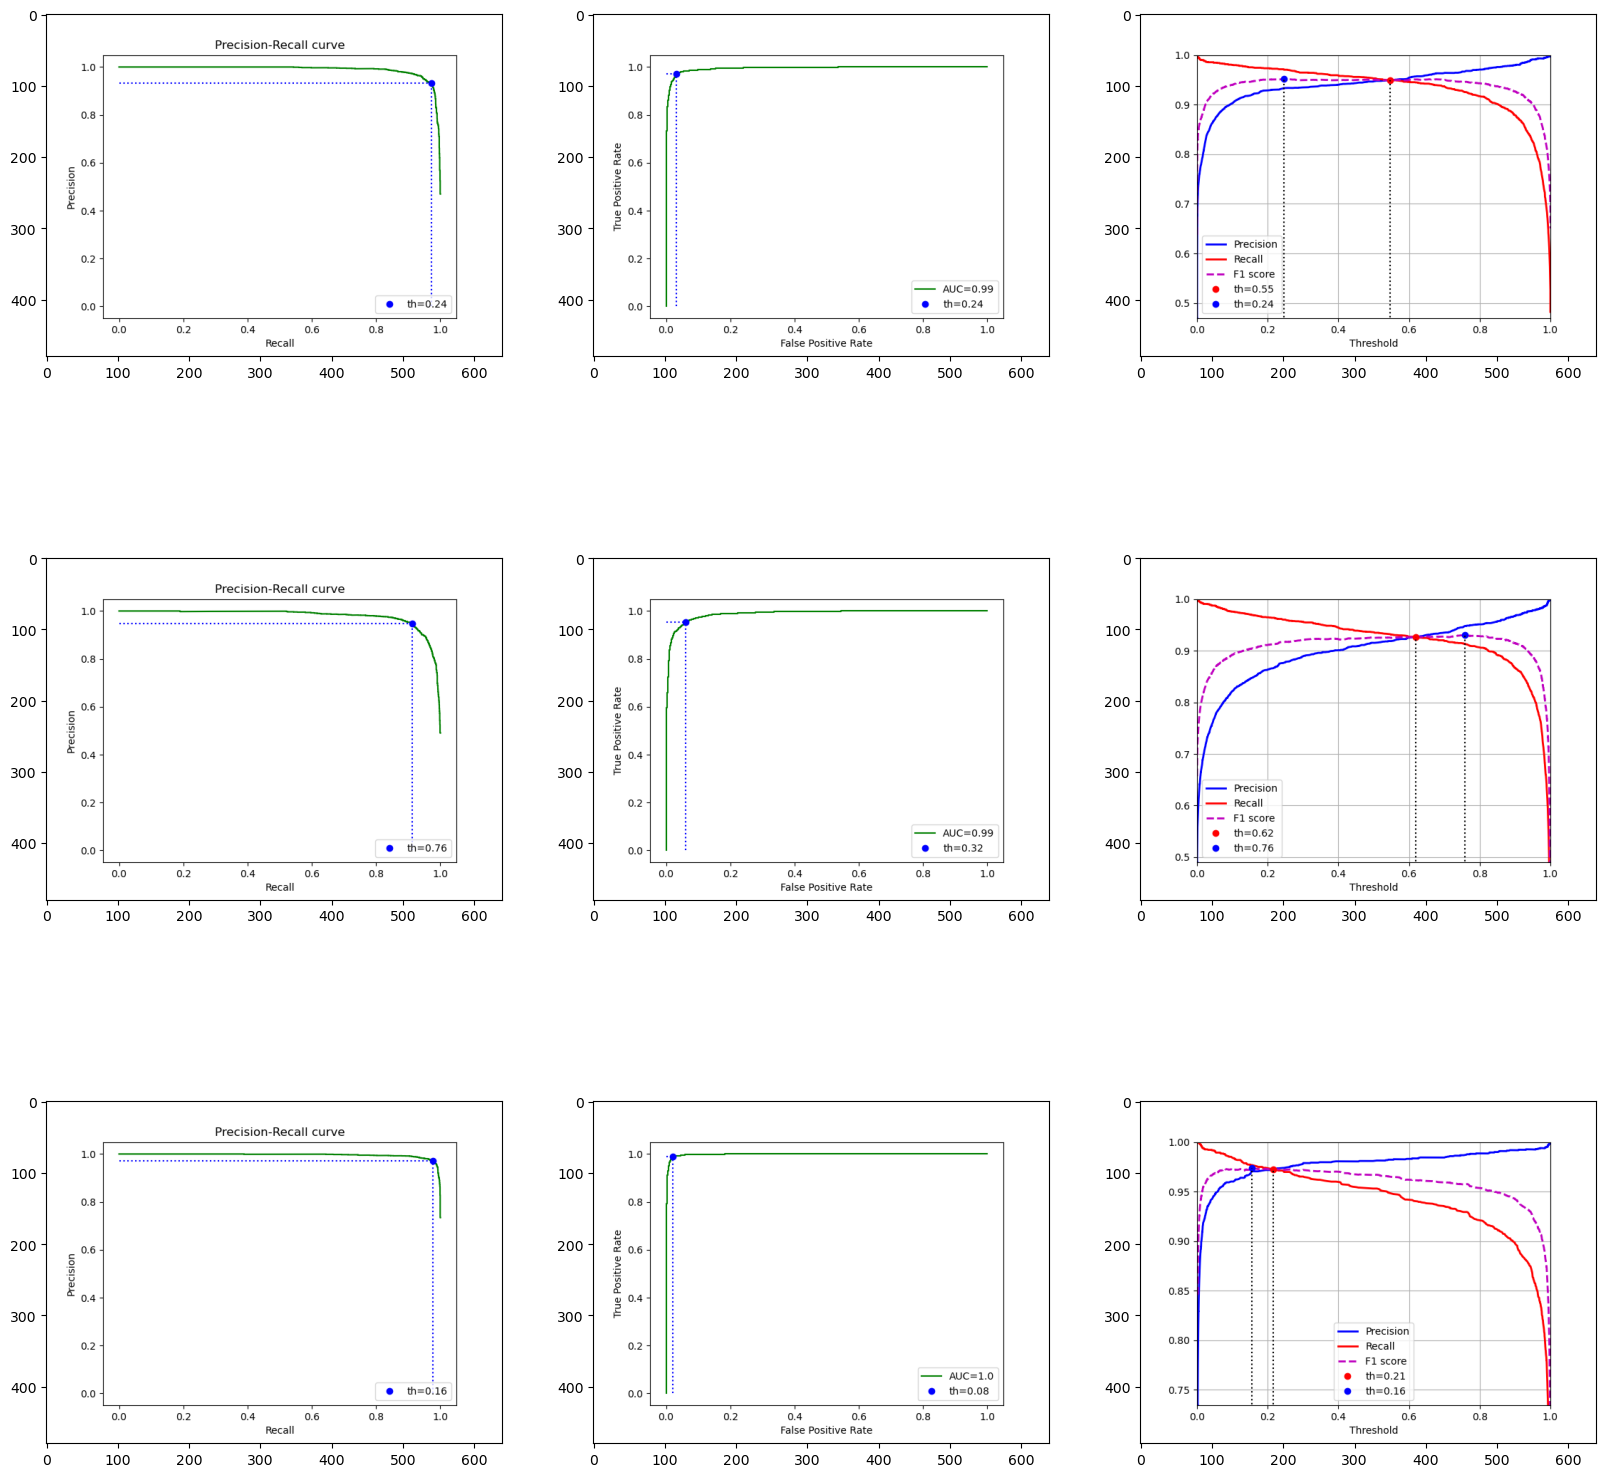

In [383]:
plt.figure(figsize=(20,20))
figure, axis = plt.subplots(3, 3)
figure.set_size_inches(20, 20)
for i, m in enumerate(os.listdir(p)[1:-1]):
    img = cv2.imread(os.path.join(p, m))
    axis[int(i/3), i%3].imshow(img)

In [384]:
with open(os.path.join(p, 'metricas.json')) as json_file:
    data = json.load(json_file)
data

{'auc_0': 0.9942494337609407,
 'younden_0': 0.24498295783996582,
 'pr_max_0': 0.24498295783996582,
 'pr_cut_0': 0.54705810546875,
 'auc_1': 0.9881578076281544,
 'younden_1': 0.32370075583457947,
 'pr_max_1': 0.7579912543296814,
 'pr_cut_1': 0.6194784045219421,
 'auc_2': 0.9979901544041244,
 'younden_2': 0.07895958423614502,
 'pr_max_2': 0.15575282275676727,
 'pr_cut_2': 0.21486026048660278,
 'f1_score_0': 0.9677735373523082,
 'precision_score_0': 0.9678091000834315,
 'recall_score_0': 0.9677469616703023,
 'accuracy_score_0': 0.9677469616703023,
 'f1_score_1': 0.9482480139690022,
 'precision_score_1': 0.9485012752383618,
 'recall_score_1': 0.9481146774696168,
 'accuracy_score_1': 0.9481146774696168,
 'f1_score_2': 0.9781055314876634,
 'precision_score_2': 0.9782313854508783,
 'recall_score_2': 0.9781863508881271,
 'accuracy_score_2': 0.9781863508881271,
 'f1_score[0, 1]': 0.6304294242908919,
 'precision_score[0, 1]': 0.7877622668237099,
 'recall_score[0, 1]': 0.6329074478030539,
 'accur

In [385]:
df = pd.read_csv(os.path.join(p, 'class_report.csv'))
df

,Unnamed: 0,precision,recall,f1-score,support
0,normal,0.946988,0.952958,0.949964,2062.0
1,moderado,0.915262,0.935601,0.925320,2205.0
2,severo,0.981331,0.953045,0.966981,2151.0
3,micro avg,0.947024,0.947024,0.947024,6418.0
4,macro avg,0.947860,0.947201,0.947421,6418.0
5,weighted avg,0.947598,0.947024,0.947200,6418.0
6,samples avg,0.947024,0.947024,0.947024,6418.0


## Test

In [386]:
p = os.path.join('/home/mr1142/Documents/Data/models/neumonia/validation_results', model_name + '_test')

In [387]:
os.listdir(p)

FileNotFoundError: [Errno 2] No such file or directory: '/home/mr1142/Documents/Data/models/neumonia/validation_results/completo_layer_mask_Xception_fine-05_batch-8_lr-0001_auc-99_test'

FileNotFoundError: [Errno 2] No such file or directory: '/home/mr1142/Documents/Data/models/neumonia/validation_results/completo_layer_mask_Xception_fine-05_batch-8_lr-0001_auc-99_test'

<Figure size 2000x2000 with 0 Axes>

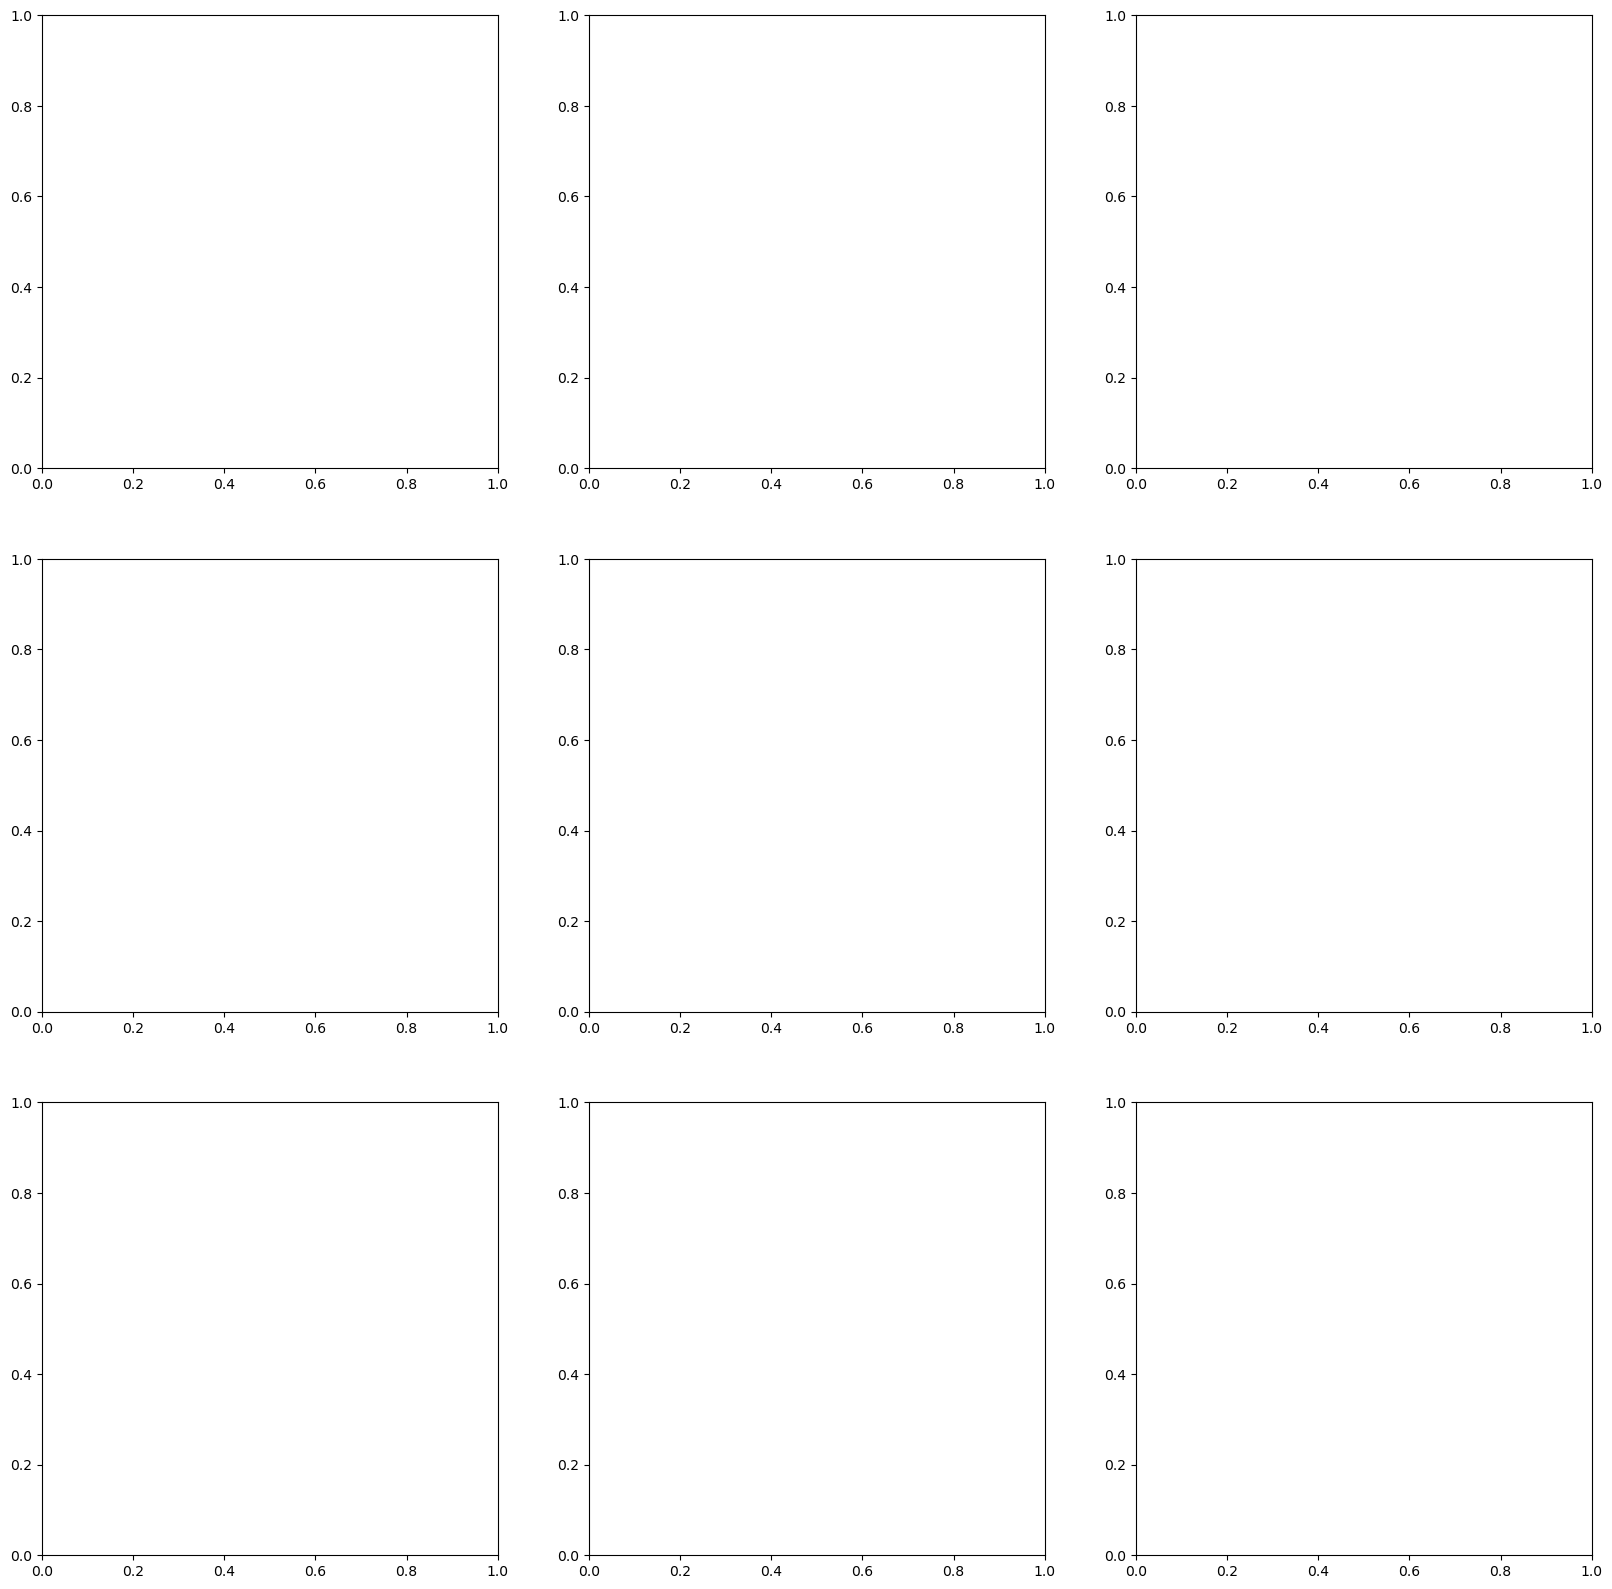

In [388]:
plt.figure(figsize=(20,20))
figure, axis = plt.subplots(3, 3)
figure.set_size_inches(20, 20)
for i, m in enumerate(os.listdir(p)[1:-1]):
    img = cv2.imread(os.path.join(p, m))
    axis[int(i/3), i%3].imshow(img)

In [ ]:
with open(os.path.join(p, 'metricas.json')) as json_file:
    data = json.load(json_file)
data

In [ ]:
df = pd.read_csv(os.path.join(p, 'class_report.csv'))
df

# OTHER DATASETS

In [389]:
import re
import numpy as np
from skimage import measure
from scipy import ndimage
import cv2
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow import keras
from skimage import exposure, filters
from sklearn import metrics

In [390]:
os.environ['CUDA_VISIBLE_DEVICES'] = str(2)

In [391]:
model_path = '/home/mr1142/Documents/Data/models/neumonia/'+ model_name + '.h5'
neumonia_model = tf.keras.models.load_model(model_path)

## Funciones

In [392]:
def recolor_resize(img, pix=256):
    try:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    except:
        print('', end = '')
    img = cv2.resize(img, (pix, pix))
    img = np.expand_dims(img, axis=-1)
    return img


def recolor(img):
    try:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    except:
        print('', end = '')
    return img


def normalize(img):
    return (img - np.mean(img))/ np.std(img)


def quitar_trozos(mask):
    mask = measure.label(mask)
    ntotal = {k: (k==mask).sum() for k in np.unique(mask) if k >0}
    k = list(ntotal.keys())[np.argmax(list(ntotal.values()))]
    mask = k==mask
    mask = ndimage.binary_fill_holes(mask, structure=np.ones((5,5)))
    return mask


def des_normalize(img):
    return cv2.normalize(img, None, alpha = 0, beta = 255,
                         norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_16UC1)


def apply_mask(img, model):
    pix1 = img.shape[0]
    pix2 = img.shape[1]
    # Paso la imagen a escala de grises
    img = recolor(img)
    # Creo una nueva imagen con las dimensiones de entrada al modelo
    img_2 = normalize(recolor_resize(img, 256))[np.newaxis,...]
    # Genero la mascara
    mask = model.predict(img_2)[0,...]
    # Escalo la mascara generada al tamaño de la imagen de entrada
    mask = cv2.resize(mask, (pix2, pix1))
    # Limpio la mascara
    mask = quitar_trozos(mask > 0.5)
    return img*mask


model_mask = os.path.join('/home/mr1142/Documents/Data/models/mascaras/unet_final_renacimiento_validation_6.h5')
model_mask = keras.models.load_model(model_mask, 
                                    custom_objects={"loss_mask": tf.keras.losses.BinaryCrossentropy, 
                                                    "dice_coef_loss": tf.keras.losses.BinaryCrossentropy,
                                                    "dice_coef": tf.keras.losses.BinaryCrossentropy})


def equalize(img, clip_limit=0.01, med_filt=5,output_type='uint16', flag_draw=False,):
    if img.dtype is np.dtype(np.float32):
        img_norm = img / img.max()                                    # Format adaptation
    else:
        img_norm = img.astype('float32') / np.iinfo(img.dtype).max                  # Format adaptation
    img_clahe = exposure.equalize_adapthist(img_norm, clip_limit=clip_limit)        # CLAHE
    img_clahe_median = filters.median(img_clahe,np.ones((3,3,1))).astype('float32')   # Median Filter

    lower, upper = np.percentile(img_clahe_median.flatten(), [2, 98])
    img_clip = np.clip(img_clahe_median,lower, upper)
    img_out = (img_clip - lower)/(upper - lower)

    if output_type is not None:
        max_val=np.iinfo(output_type).max
        img_out=(max_val*img_out).astype(output_type)
    else:
        max_val=1.0
    return img_out


def clahe(img):
    clahe = cv2.createCLAHE(clipLimit = 2)
    img = np.uint8(img)
    final_img = clahe.apply(img)
    final_img = np.expand_dims(final_img, axis=-1)
    return final_img


def get_prepared_img(img, pix, mask = False, clahe_bool = True, equalize_bool = False):
    if mask:
        img = des_normalize(apply_mask(img, model_mask))
    img = recolor_resize(img, pix)
    if clahe_bool:
        img = clahe(img)
    if equalize_bool:
        img = equalize(img)
    img = normalize(img)
    return img

In [393]:
def AUC_plot(fpr, tpr, thresholds, auc):
    fig, ax = plt.subplots()
    i = np.argmax(tpr-fpr)
    th = thresholds[i]
    x = fpr[i]
    y = tpr[i]
    ax.plot(fpr,tpr, "g-", label="AUC="+str(round(auc, 2)))
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    try:
        ax.plot([x, x], [0, y], "r:")
        ax.plot([0, x], [y, y], "r:")
    except:
        print('plot except')
    ax.plot([x], [y], "ro", label="th="+str(round(th,2))) 
    ax.legend(loc=4)
    return fig



def pred_recall_plot(precision, recall, thresholds):
    fig, ax = plt.subplots()
    i = np.argmax(precision+recall)
    x = recall[i]
    y = precision[i]
    th = thresholds[i]
    ax.plot(recall, precision, "g-")
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    try:
        ax.plot([x, x], [0, y], "r:")
        ax.plot([0, x], [y, y], "r:")
    except:
        print('plot except')
    ax.plot([x], [y], "ro", label="th="+str(round(th,2))) 
    ax.legend(loc=4)
    ax.set_title('Precision-Recall curve')
    return fig


def plot_precision_recall_vs_threshold(precision, recall, thresholds):
    fig, ax = plt.subplots()
    f1 = f1_score(precision, recall)
    x_f = thresholds[np.where(f1 == max(f1))]
    y_f = max(f1)
    x = thresholds[np.where(precision == recall)]
    y = precision[np.where(precision == recall)]
    ax.axis([0 ,1, np.min(precision), 1])
    ax.plot(thresholds, precision[:-1], "r-", label="Precision", linewidth=2)
    ax.plot(thresholds, recall[:-1], "b-", label="Recall", linewidth=2)
    ax.plot(thresholds, f1[:-1], "m--", label="F1 score", linewidth=2)
    try:
        for i in range(len(x)):
            ax.plot([x[i]], [y[i]], "bo", label="th="+str(round(x[i],2)))
            ax.plot([x[i], x[i]], [0, y[i]], "k:")
    except:
        ax.plot([x], [y], "bo", label="th="+str(round(x[0],2)))
        ax.plot([x, x], [0, y], "k:")
    try:
        for i in range(len(x)):
            ax.plot([x_f[i]], [y_f[i]], "bo", label="th="+str(round(x_f[i],2)))
            ax.plot([x_f[i], x_f[i]], [0, y_f[i]], "k:")
    except:
        ax.plot([x_f], [y_f], "ro", label="th="+str(round(x_f[0],2))) 
        ax.plot([x_f, x_f], [0, y_f], "k:")
    ax.set_xlabel("Threshold")
    ax.grid(True)
    ax.legend()
    return fig

In [394]:
# METRICAS
def younden_idx(real, pred):
    fpr, tpr, thresholds = metrics.roc_curve(real, pred)
    return thresholds[np.argmax(tpr-fpr)]


def pred_recall_thres(precision, recall, thresholds):
    pr_max = thresholds[np.argmax(precision+recall)]
    try:
        pr_cut= thresholds[np.where(precision == recall)][0]
    except:
        pr_cut= thresholds[np.where(precision == recall)]
    if not isinstance(pr_cut, float):
        pr_cut = float('inf')
    return pr_max, pr_cut


def f1_score(precision, recall):
    return 2*(precision*recall)/(precision+recall)


# EXTRACT MAX
def binarize(array, threshold):
    array[array >= threshold] = 1
    array[array < threshold] = 0
    return array

def extract_max(array):
    for i in range(array.shape[0]):
        max = np.argmax(array[i,:])
        array[i,:] = 0
        array[i,max] = 1
    return array


# Cada una de las clases genera un diccionario con las metricas y los plots
def metrics_per_class(real, pred):
    metricas = {}
    fpr, tpr, auc_thresholds = metrics.roc_curve(real, pred)
    auc = metrics.auc(fpr, tpr)
    metricas['auc'] = auc
    metricas['younden'] = younden_idx(real, pred)
    precision, recall, pr_thresholds = metrics.precision_recall_curve(real, pred)
    metricas['pr_max'], metricas['pr_cut'] = pred_recall_thres(precision, 
                                                                            recall, 
                                                                            pr_thresholds)
    plots = {}
    plots['pred_rec_plot'] = pred_recall_plot(precision, recall, pr_thresholds)
    plots['auc_plot'] = AUC_plot(fpr, tpr, auc_thresholds, auc)
    plots['pr_re_th_plot'] = plot_precision_recall_vs_threshold(precision, 
                                                                        recall, 
                                                                        pr_thresholds)
    return metricas, plots


# Por cada prediccion se generan metricas por clase, por combinaciones binarias y por maximo
def metricas_dict(real, pred):
    metrics_dict = {}
    plot_dict = {}
    metricas, plots = metrics_per_class(real, pred[:,0])
    metrics_dict.update(metricas)
    plot_dict.update(plots)
    thresholds = ['younden','pr_max','pr_cut']

    for threshold in thresholds:
        binar = binarize(pred[:,0].copy(), metricas[threshold])
        metrics_dict['f1_score_' + threshold] = metrics.f1_score(real, binar, 
                                                                average = 'weighted')
        metrics_dict['precision_score_' + threshold] = metrics.precision_score(real, 
                                                                            binar, 
                                                                            average = 'weighted')
        metrics_dict['recall_score_' + threshold] = metrics.recall_score(real, 
                                                                        binar, 
                                                                        average = 'weighted')
        metrics_dict['accuracy_score_' + threshold] = metrics.accuracy_score(real, binar)
    
    binar = binarize(pred[:,0].copy(), 0.5)
    metrics_dict['f1_score_' + str(0.5)] = metrics.f1_score(real, binar, 
                                                            average = 'weighted')
    metrics_dict['precision_score_' + str(0.5)] = metrics.precision_score(real, 
                                                                        binar, 
                                                                        average = 'weighted')
    metrics_dict['recall_score_' + str(0.5)] = metrics.recall_score(real, 
                                                                    binar, 
                                                                    average = 'weighted')
    metrics_dict['accuracy_score_' + str(0.5)] = metrics.accuracy_score(real, binar)
    
    binar = extract_max(pred.copy())[:,0]
    metrics_dict['f1_score_' + 'max'] = metrics.f1_score(real, binar, 
                                                            average = 'weighted')
    metrics_dict['precision_score_' + 'max'] = metrics.precision_score(real, 
                                                                        binar, 
                                                                        average = 'weighted')
    metrics_dict['recall_score_' + 'max'] = metrics.recall_score(real, 
                                                                    binar, 
                                                                    average = 'weighted')
    metrics_dict['accuracy_score_' + 'max'] = metrics.accuracy_score(real, binar)

    return metrics_dict, plot_dict

## PEDIATRIC

### Cargar datos

In [395]:
def create_dataframe(folder, path = '/home/mr1142/Documents/Data/chest_xray'):
    path = os.path.join('/home/mr1142/Documents/Data/chest_xray', folder)
    for fold in os.listdir(path):
        globals()[fold] = {}
        imgs = os.listdir(os.path.join(path, fold))
        globals()[fold]['path'] = [os.path.join(path, fold)] * len(imgs)
        globals()[fold]['img_name'] = imgs
        globals()[fold]['normal'] = [1 if fold == 'NORMAL' else 0 for _ in range(len(imgs))]
        globals()[fold]['viral'] = [1 if re.search('virus', imgs[i]) else 0 for i in range(len(imgs))]
        globals()[fold]['bacteria'] = [1 if re.search('bacteria', imgs[i]) else 0 for i in range(len(imgs))]
        globals()[fold]['real'] = [0 if fold == 'NORMAL' else 1 if re.search('virus', imgs[i]) else 2 for i in range(len(imgs))]

    for k, v in PNEUMONIA.items():
        v.extend(NORMAL[k])

    df = pd.DataFrame(PNEUMONIA)

    return df

In [396]:
ped = create_dataframe('train')

### AUC

In [397]:
print(len(ped))

5216


In [398]:
pixels = 512

In [399]:
df = ped
# df = df[df['bacteria'] == 0]
imgs = [os.path.join(df.path[i], df.img_name[i]) for i in df.index]
true = list(df['normal'])

In [ ]:
pred = [neumonia_model.predict(np.expand_dims(get_prepared_img(cv2.imread(im),pixels), axis = 0)) for im in imgs]

- Calculo de AUC respecto a normal o neumo

In [ ]:
pred = np.vstack(pred)

In [ ]:
true = np.array(true)
print(sum(true == 0))
print(sum(true == 1))

In [ ]:
mets, plots = metricas_dict(true, pred)

In [ ]:
mets

### Mejor threshold

In [ ]:
cols = [met[:-8] for met in list(mets.keys())[4:8]]
rows = ['younden', 'pr_max', 'pr_cut', '0.5', 'max']

In [ ]:
df = pd.DataFrame(columns = cols, index = rows)

In [ ]:
values = list(mets.values())[4:]
for i in range(len(df)):
    df.iloc[i] = values[i*4:i*4+4]

In [ ]:
df['mean'] = (df.f1_score + df.precision_score + df.recall_score + df.accuracy_score)/4

In [ ]:
df.sort_values('mean')

## COVID

### Cargar datos

In [ ]:
path = '/home/mr1142/Documents/Data/neumonia_covid/all'
covid = pd.read_csv('/home/mr1142/Documents/Data/neumonia_covid/dataframe.csv')

In [ ]:
# covid = covid[covid['class'] != 'pneumonia'].reset_index(drop = True)
covid['class'][covid['class'] == 'pneumonia'] = 0
covid['class'][covid['class'] == 'covid'] = 0
covid['class'][covid['class'] == 'normal'] = 1

In [ ]:
len(covid)

### AUC

In [ ]:
print(len(covid))

In [ ]:
pixels = 512

In [ ]:
df = covid
imgs = [os.path.join(path, df.img_name[i]) for i in df.index]
true = list(df['class'])

In [ ]:
pred = [neumonia_model.predict(np.expand_dims(get_prepared_img(cv2.imread(im),pixels), axis = 0)) for im in imgs]

- Calculo de AUC respecto a normal o neumo

In [ ]:
pred = np.vstack(pred)

In [ ]:
true = np.array(true)
print(sum(true == 0))
print(sum(true == 1))

In [ ]:
mets, plots = metricas_dict(true, pred)

In [ ]:
mets

### Mejor threshold

In [ ]:
cols = [met[:-8] for met in list(mets.keys())[4:8]]
rows = ['younden', 'pr_max', 'pr_cut', '0.5', 'max']

In [ ]:
df = pd.DataFrame(columns = cols, index = rows)

In [ ]:
cols

In [ ]:
values = list(mets.values())[4:]
for i in range(len(df)):
    df.iloc[i] = values[i*4:i*4+4]

In [ ]:
df['mean'] = (df.f1_score + df.precision_score + df.recall_score + df.accuracy_score)/4

In [ ]:
df.sort_values('mean')

## NIH

In [ ]:
path = '/home/mr1142/Documents/Data/NIH'

In [ ]:
nih = pd.read_csv(os.path.join(path, 'Data_Entry_2017.csv'))

In [ ]:
labels = np.unique(nih['Finding Labels'])
labels = '|'.join(labels)
labels = labels.split('|')
labels = np.unique(labels).tolist()

In [ ]:
for lab in labels:
    nih[lab] = pd.NA

In [ ]:
def fill_label(information, label):
    positive_labels = information.split('|')
    if label in positive_labels:
        return 1
    return 0

In [ ]:
for lab in labels:
    nih[lab] = list(map(lambda x: fill_label(x, lab), nih['Finding Labels'].tolist()))

In [ ]:
nih = nih.sample(frac=1).reset_index(drop = True)

In [ ]:
sum(nih['Finding Labels'] == 'Consolidation')

In [ ]:
print(sum(nih.Consolidation == 1))
print(sum(nih['No Finding'] == 1))

In [ ]:
n = 2000

In [ ]:
neumo = nih[nih.Consolidation == 1][0:n]
normal = nih[nih['No Finding'] == 1][0:n]

In [ ]:
nih = pd.concat([neumo, normal]).reset_index(drop = True)
nih = nih.sample(frac=1).reset_index(drop = True)

### AUC

In [ ]:
print(len(nih))

In [ ]:
pixels = 512

In [ ]:
def get_paths(img_list):
    names = []
    imgs = {}
    imgs_names = []
    path = '/home/mr1142/Documents/Data/NIH'
    subfolders = [f.path for f in os.scandir(path) if f.is_dir()]
    # De todas las imagenes que quiero cargar miro cuantas hay en cada carpeta y las cargo
    for folder in subfolders:
        folder_images = os.listdir(os.path.join(folder, 'images'))
        this_folder_imgs = set(img_list).intersection(folder_images)
        names = names + list(this_folder_imgs)
        for im in this_folder_imgs:
            imgs[im] = os.path.join(path, folder, 'images', im)
    return imgs

In [ ]:
paths = get_paths(nih['Image Index'])
nih['path'] = [paths[im] for im in nih['Image Index']]

In [ ]:
df = nih
imgs = list(df['path'])
true = list(df['Consolidation'])

In [ ]:
pred = [neumonia_model.predict(np.expand_dims(get_prepared_img(cv2.imread(im),pixels), axis = 0)) for im in imgs]

- Calculo de AUC respecto a normal o neumo

In [ ]:
pred = np.vstack(pred)

In [ ]:
true = abs(1-np.array(true))
print(sum(true == 0))
print(sum(true == 1))

In [ ]:
mets, plots = metricas_dict(true, pred)

In [ ]:
mets

### Mejor threshold

In [ ]:
cols = [met[:-8] for met in list(mets.keys())[4:8]]
rows = ['younden', 'pr_max', 'pr_cut', '0.5', 'max']

In [ ]:
df = pd.DataFrame(columns = cols, index = rows)

In [ ]:
values = list(mets.values())[4:]
for i in range(len(df)):
    df.iloc[i] = values[i*4:i*4+4]

In [ ]:
df['mean'] = (df.f1_score + df.precision_score + df.recall_score + df.accuracy_score)/4

In [ ]:
df.sort_values('mean')

# HEATMAP

In [ ]:
from scipy.ndimage import zoom
import shap

In [ ]:
neumonia_model.summary()

In [ ]:
i = np.random.randint(1000)
sano = ped[ped['normal'] == 1].iloc[i]
enfermo = ped[ped['normal'] == 0].iloc[i]
sano_im = cv2.imread(os.path.join(sano.path, sano.img_name))
enf_im = cv2.imread(os.path.join(enfermo.path, enfermo.img_name))
sano_prepared = np.expand_dims(get_prepared_img(sano_im, pixels, mask = True), axis = 0)
enf_prepared = np.expand_dims(get_prepared_img(enf_im, pixels, mask = True), axis = 0)

In [ ]:
sano = covid[covid['class'] == 1].iloc[np.random.randint(1000)]
enfermo = covid[covid['class'] == 0].iloc[np.random.randint(1000)]
sano_im = cv2.imread(os.path.join(path, sano.img_name))
enf_im = cv2.imread(os.path.join(path, enfermo.img_name))
sano_prepared = np.expand_dims(get_prepared_img(sano_im, pixels), axis = 0)
enf_prepared = np.expand_dims(get_prepared_img(enf_im, pixels), axis = 0)

In [ ]:
figure, axis = plt.subplots(2,2)
figure.set_size_inches(10,10)
axis[0,0].imshow(sano_im)
axis[0,0].set_title('SANO')
axis[0,1].imshow(enf_im)
axis[0,1].set_title('NEUMONIA')
axis[1,0].imshow(sano_prepared[0,...], cmap = 'gray')
axis[1,1].imshow(enf_prepared[0,...], cmap = 'gray')
print('                     {}                                 {}'.format(neumonia_model.predict(sano_prepared)[0][0], neumonia_model.predict(enf_prepared)[0][0]))

In [ ]:
model1 = tf.keras.models.Model(neumonia_model.inputs, neumonia_model.layers[0].output)

In [ ]:
model = tf.keras.models.Model([neumonia_model.input, neumonia_model.layers[1].input], [neumonia_model.layers[1].output, neumonia_model.output])

In [ ]:
img = enf_prepared

In [ ]:
conv, pred = model.predict([img, model1(img)])

In [ ]:
scale = 224 / 7
plt.figure(figsize=(12, 12))
plt.imshow(img[0,...])
plt.imshow(zoom(np.sum(conv, axis = 3).squeeze(), zoom=(scale, scale)), cmap='jet', alpha=0.5)

# GRAD-CAM

In [ ]:
import matplotlib.cm as cm
from IPython.display import Image, display

In [ ]:
neumonia_model.summary()

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

In [ ]:
sano = covid[covid['class'] == 1].iloc[np.random.randint(1000)]
enfermo = covid[covid['class'] == 0].iloc[np.random.randint(1000)]
sano_im = cv2.imread(os.path.join(path, sano.img_name))
enf_im = cv2.imread(os.path.join(path, enfermo.img_name))
sano_prepared = np.expand_dims(get_prepared_img(sano_im, pixels), axis = 0)
enf_prepared = np.expand_dims(get_prepared_img(enf_im, pixels), axis = 0)

In [ ]:
figure, axis = plt.subplots(1,2)
figure.set_size_inches(10,10)
axis[0].imshow(sano_im)
axis[0].set_title('SANO')
axis[1].imshow(enf_im)
axis[1].set_title('NEUMONIA')
print('                     {}                                 {}'.format(neumonia_model.predict(sano_prepared)[0][0], neumonia_model.predict(enf_prepared)[0][0]))

In [ ]:
heatmap = make_gradcam_heatmap(enf_prepared, neumonia_model, 'conv_salida')
# Display heatmap
plt.matshow(heatmap)
plt.show()

In [ ]:
save_and_display_gradcam(enf_im, heatmap)